## Algoritmia y Complejidad - Algoritmo de Dijkstra 

Steven Wilson y Fabricio Juarez

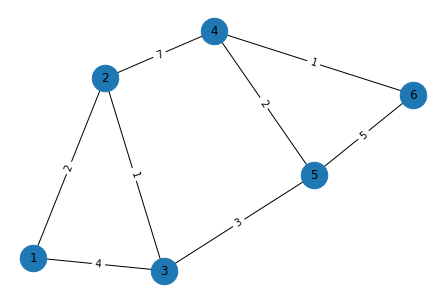

Current Node: 1 -> neighbors: [2, 3]
Best Next node: 2, weight: 2
Seen Nodes: [1]

Current Node: 2 -> neighbors: [3, 4]
Best Next node: 3, weight: 1
Seen Nodes: [1, 2]

Current Node: 3 -> neighbors: [5]
Best Next node: 5, weight: 3
Seen Nodes: [1, 2, 3]

Current Node: 5 -> neighbors: [4, 6]
Best Next node: 4, weight: 2
Seen Nodes: [1, 2, 3, 5]

Current Node: 4 -> neighbors: [6]
Best Next node: 6, weight: 1
Seen Nodes: [1, 2, 3, 5, 4]

Total Weight 9


1

In [72]:
import networkx as nx
import matplotlib.pyplot as plt


def build_graph(e):
    
    G=nx.Graph()
    G.add_weighted_edges_from(e)
    
    return G
    
def plot_graph(G):
    
    pos = nx.spring_layout(G)
    nx.draw(G,pos,node_size=700)
    nx.draw_networkx_labels(G, pos)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show(G)


def get_neighbors(G, current_node, seen_nodes):
    
    neighbors = [n for n in G.neighbors(current_node)]
    valid_neighbors = []
    
    for neighbor in neighbors:
        if neighbor not in seen_nodes: 
            valid_neighbors.append(neighbor)
            
    return valid_neighbors

def get_sorted_neighbors(current_node, neighbors):
    
    neighbor_weights=[]

    for neighbor in neighbors:
        neighbor_weights.append((neighbor, G.get_edge_data(current_node, neighbor)["weight"]))

    neighbor_weights.sort(key=lambda x:x[1])
    
    return neighbor_weights

def dijkstra(G, current_node, seen_nodes = None, total_weight = 0):
    
    if seen_nodes is None:
        seen_nodes = []
        
    neighbors = get_neighbors(G, current_node, seen_nodes)
    
    if neighbors == []:
        print(f"Total Weight {total_weight}")
        return 1
    
    else:

        print(f"Current Node: {current_node} -> neighbors: {neighbors}")

        neighbors= get_sorted_neighbors(current_node, neighbors)
        
        next_node = neighbors[0][0]
        next_node_weight = neighbors[0][1]

        print(f"Best Next node: {next_node}, weight: {next_node_weight}")

        seen_nodes.append(current_node)
        print(f"Seen Nodes: {seen_nodes}\n")
        
        total_weight += next_node_weight
        
        return dijkstra(G, next_node, seen_nodes, total_weight)

# -------------------------------------------------------------------------------------------------------

e = [(1, 2, 2), (2, 3, 1), (2,4,7), (1, 3, 4), (3,5,3),(5,4,2),(5,6,5),(4,6,1) ]

G = build_graph(e)
plot_graph(G)

dijkstra(G, 1)
